# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
# Importing the necessary libraries and setting up the environment
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from ExchangeEconomy import ExchangeEconomyClass

# Question 1

**Explain how you solve the model**

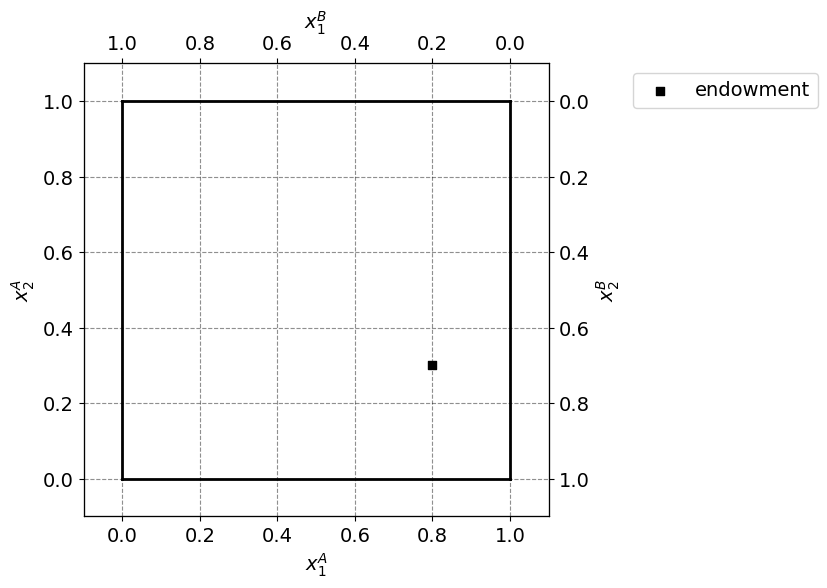

In [3]:
model = ExchangeEconomyClass()
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

namespace(alpha=0.3333333333333333, beta=0.6666666666666666, w1A=0.8, w2A=0.3)


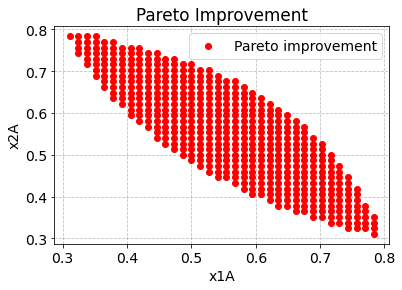

In [4]:
model = ExchangeEconomyClass()
par = model.par
print(par)
N = 75 # number of points in grid for consumption
x1A, x2A = np.linspace(0,1,N), np.linspace(0,1,N)
pareto_improve = model.pareto_improve(x1A,x2A)

import matplotlib.pyplot as plt

# Extract the x and y coordinates from the pareto_improve list
x_coords = [pair[0] for pair in pareto_improve]
y_coords = [pair[1] for pair in pareto_improve]

# Create the scatter plot
plt.scatter(x_coords, y_coords, label='Pareto improvement', color='red')

# Add labels and title to the plot
plt.xlabel('x1A')
plt.ylabel('x2A')
plt.title('Pareto Improvement')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Question 2

In this question, we calculate the error in market clearing when $p_1 \in \mathcal{P}_1=\left\{0.5,0.5+2 \frac{1}{N}, 0.5+2 \frac{2}{N}, \ldots, 2.5\right\}$

In [5]:
start, N = 0.5, 75
p1 = np.array([start + 2.0*i/N for i in range(N + 1)])

error1 = np.zeros([N])
error2 = np.zeros([N])

for i in range(N):
    error1[i], error2[i] = model.check_market_clearing(p1[i])

# print(error1, p1)

# Question 3

Using Walras' law, we know that if one market clears, the other market will also clear.This implies that we can solve the root-finding problem $\epsilon_1(\boldsymbol{p}, \boldsymbol{\omega})=0$ i.e. market 1 will clear. Then we know, that market 2 will also be clearing.

In [6]:
from scipy import optimize
obj = lambda p1: model.check_market_clearing(p1)[0] # here the input is a scalar
res = optimize.root_scalar(obj,bracket=(1e-8,10),method='bisect')
x = res.root
error_equilibrium = model.check_market_clearing(res.root)
print(f'Error in equilibrium {error_equilibrium} with equilbrium price p_1 = {x:.8f}')

Error in equilibrium (-1.8934853684982045e-13, 1.7896795156957523e-13) with equilbrium price p_1 = 0.94444444


# Question 4

## Question 4a

In [7]:
# Calculate the demand for agent B given the prices in p1
x1B, x2B = model.demand_B(p1)

# Applying a boolean mask to ensure that the values of x1B and x2B are within the unit interval
x1B[x1B > 1] = np.nan
x2B[x2B > 1] = np.nan

# Calculate the utility for agent A given agent B's demand
utilityA = model.utility_A(1 - x1B,1 - x2B)

# Finding the maximum utility and the corresponding index (Using nanmax and nanargmax to handle NaN values)
utilityA_max = np.nanmax(utilityA)
index = np.nanargmax(utilityA)

# Finding the optimal price for agent A to choose
p1_opt_A = p1[index]
print(f'Optimal price for agent A is {p1_opt_A:.8f} with utility {utilityA_max:.8f}')
print(f'The allocation is: x1 = {1-x1B[index]:.8f}, x2 = {1-x2B[index]:.8f}')

Optimal price for agent A is 2.50000000 with utility 0.74168595
The allocation is: x1 = 0.68000000, x2 = 0.60000000


## Question 4b

In [21]:
1 - model.demand_B(0.5)[0]
p1_opt_A_free, utilityA_free = model.solve_A()
print(f'Optimal price for agent A is {p1_opt_A_free:.8f} with utility {utilityA_free:.8f}')

Optimal price for agent A is 2.48641314 with utility 0.77657803


In [7]:
from scipy.optimize import minimize

# Define parameters
alpha = 1/3
beta = 2/3

# Define utility function
def utility(p):
    x1,x2 = model.demand_B(p)  # Quantity of good 1

    return model.utility_A(x1,x2) # Negative sign for maximization

# Define initial guess
p0 = [0.5]  # Initial guess for quantities of goods 1 and 2

# Perform optimization
result = minimize(utility, p0)

# Print results using f-strings
optimal_p = result.x[0]
optimal_utility = -result.fun  # Reverse the sign back to positive
print(f"Optimal price: {optimal_p:.3f}")
print(f"Optimal utility: {optimal_utility:.3f}")


Optimal price: 3.500
Optimal utility: -0.499


# Question 5

## Question 5A

## Question 5B

In [8]:
from scipy.optimize import minimize

# Define parameters
alpha = 1/3
beta = 2/3

# Define utility function
def utility(p):
    x1,x2 = model.demand_A(p)  # Quantity of good 1
    
    u = model.utility_A(x1,x2)
    if model.utility_A(1-x1,1-x2) < model.utility_A(par.w1A,par.w2A):
        u = -np.nan
    
    return u # Negative sign for maximization


# Define initial guess
p0 = [0.5]  # Initial guess for quantities of goods 1 and 2

# Perform optimization
result = minimize(utility, p0,method='nelder-mead')

# Print results using f-strings
optimal_p = result.x[0]
optimal_utility = -result.fun  # Reverse the sign back to positive
print(f"Optimal price: {optimal_p:.3f}")
print(f"Optimal utility: {optimal_utility:.3f}")
print(model.demand_A(optimal_p))

Optimal price: 0.375
Optimal utility: -0.598
(0.5333333333333333, 0.39999999999999997)


ADD CONCISE CONLUSION.